In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
coco = COCO("../data/annotations_0_train.json")
img_dir = "../data/images"
image_id = 10
img = coco.imgs[image_id]

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [3]:
img

{'id': 10,
 'width': 1537,
 'height': 2049,
 'file_name': 'batch_1/000012.jpg',
 'license': None,
 'flickr_url': 'https://farm66.staticflickr.com/65535/40888877173_855795c875_o.png',
 'coco_url': None,
 'date_captured': None,
 'flickr_640_url': 'https://farm66.staticflickr.com/65535/40888877173_734cec88e1_z.jpg'}

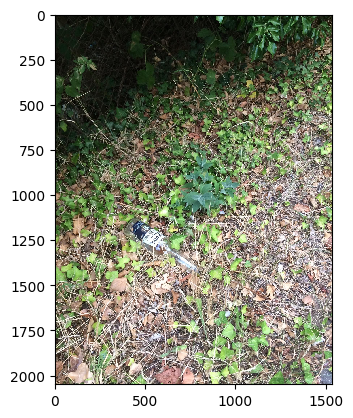

In [4]:
image = np.array(Image.open(os.path.join(img_dir, img["file_name"])))
plt.imshow(image, interpolation="nearest")
plt.show();

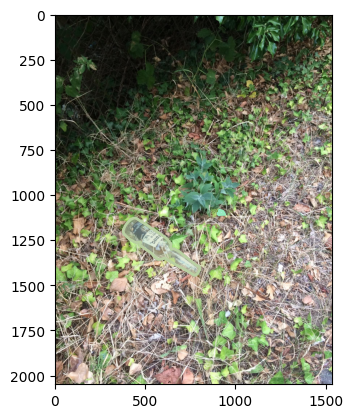

In [5]:
plt.imshow(image);
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img["id"], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

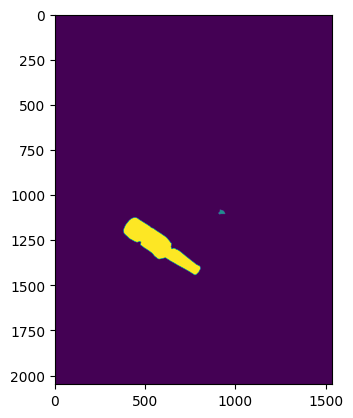

In [6]:
mask = coco.annToMask(anns[0])

for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask);

In [8]:
mask_img = Image.fromarray((mask).astype(np.uint8))
mask_img.save("mask.png")